In [1]:
import os

from collections import Counter

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from torch.utils.data import DataLoader, random_split
from torchinfo import summary
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

torch.backends.cudnn.deterministic = True

### Prepare the Environment

**Task 1.5.1:**

Get the GPU device, if it is available.  Store the device name in the variable `device`.

In [3]:
if torch.cuda.is_available():
    device = "gpu"
else:
    device = "cpu"
print(f"your device is: {device}")

your device is: cpu


### Load the Data

The data for this assignment is contained in the directory `sea_creatures`. In this directory, there are two folders.  We'll use `train` to train our classification model, and then submit predictions about the `test` images to the grader.

In [4]:
os.listdir("sea_creatures")

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'sea_creatures'

**Task 1.5.2:**

Find the names of the classes we will be working with.  Images for each class are inside folders within the `sea_creatures/train` folder.  Make a list of the class names (each corresponding to a directory name). Your list should be named `classes`.


In [5]:
train_dir = os.path.join('sea_creatures','train')
classes = os.listdir(train_dir)
print(classes)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'sea_creatures\\train'

**Task 1.5.3:**

Build a transformer pipeline.  It should ensure the images are in RGB format, scale them to 224$\times$224 pixels, and convert them into a PyTorch tensor.  You will probably find `ConvertToRGB` useful.

In [6]:
height = 224
width = 224


class ConvertToRGB:
    def __call__(self, img):
        if img.mode != "RGB":
            img = img.convert("RGB")
        return img


transform = transforms.Compose([
    ConvertToRGB(),
    transforms.Resize((224,224)),
    transforms.ToTensor()
    # ... your steps ...
    # ... your steps ...
    # ... your steps ...
])

print(transform)

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


**Task 1.5.4:**

Test that the transformer pipeline is working.  Load in the specified training image and transform it.  Check that you get a 3$\times$224$\times$224 tensor.


In [7]:
sample_file = "sea_creatures/train/Dolphin/10004986625_0f786ab86b_b.jpg"

image = Image.open(sample_file)# load your image

transformed_image = transform(image)
print(transformed_image.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\WANG ZHICHONG\\Downloads\\competition_VfIpjyh\\sea_creatures\\train\\Dolphin\\10004986625_0f786ab86b_b.jpg'

**Task 1.5.5:**

Create a `DataSet` for the training data (using the `ImageFolder` subclass). It should apply the transformer pipeline.

In [9]:
dataset = datasets.ImageFolder(train_dir, transform=transform)
print("Image size", dataset[0][0].shape)
print("Label", dataset[0][1])

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'sea_creatures\\train'

**Task 1.5.6:**

Calculate the class distribution.  Store this in the variable `class_distribution` as a dictionary.  The keys should be the class names.  The values should be the number of training samples for the class.

In [10]:
# This will get us the counts, but notice that the keys are the class indices,
# not the class names.
counts = Counter(x[1] for x in tqdm(dataset))
print("The counts dictionary:", counts)

# This dictionary maps class names to their index.
print("The class_to_idx dictionary:", dataset.class_to_idx)

# Use both of these to construct the desired dictionary
idx_to_class = {v:k for k,v in dataset.class_to_idx.items()}

class_distribution = {idx_to_class[idx]:count for idx, count in counts.items()}
print(class_distribution)

NameError: name 'dataset' is not defined

## Transform the Data
**Task 1.5.7:**

Create a `DataLoader` that loads from this `DataSet` in batches of 32.

In [11]:
batch_size = 32
dataset_loader = DataLoader(dataset, batch_size=32,shuffle=True)

# Get one batch
first_batch = next(iter(dataset_loader))

print(f"Shape of one batch: {first_batch[0].shape}")
print(f"Shape of labels: {first_batch[1].shape}")

NameError: name 'dataset' is not defined

**Task 1.5.8:** Calculate the mean and standard deviation of each channel in this data set.

Fill the missing lines in the `get_mean_std` function and invoke it with the right dataset.

This will calculate the correct values for `mean` and `std`.


In [12]:
def get_mean_std(loader):
    """Computes the mean and standard deviation of image data.

    Input: a `DataLoader` producing tensors of shape [batch_size, channels, pixels_x, pixels_y]
    Output: the mean of each channel as a tensor, the standard deviation of each channel as a tensor
            formatted as a tuple (means[channels], std[channels])"""

    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in tqdm(loader):
        channels_sum += torch.mean(data, dim=[0, 2, 3])
        channels_squared_sum += torch.mean(data**2, dim=[0, 2, 3])
        num_batches += 1
    # Compute the mean from the channels_sum and num_batches
    mean = channels_sum / num_batches
    # Compute the standard deviation form channels_squared_sum, num_batches,
    # and the mean.
    std =torch.sqrt(channels_squared_sum / num_batches - mean**2)

    return mean, std


mean, std = get_mean_std(dataset_loader)

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

NameError: name 'dataset_loader' is not defined

**Task 1.5.9:**

Build a new transformer pipeline that normalizes the channels according to the mean and standard deviation above. The pipeline should be assigned to the variable `transform_norm`. Afterwards, use the pipeline to create a normalized data set and store it in the variable `norm_dataset`.

In [14]:
transform_norm = transforms.Compose([
    ConvertToRGB(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,std=std)
])
print(transform_norm)

NameError: name 'mean' is not defined

In [15]:
norm_dataset = datasets.ImageFolder(train_dir,transform=transform_norm)

print("Image size", norm_dataset[0][0].shape)
print("Label", norm_dataset[0][1])

NameError: name 'transform_norm' is not defined

**Task 1.5.10:**

Split the normalized data set into a training set and a validation set. 80% of the data should be in the training set, and 20% in the validation set.

In [17]:
train_dataset, val_dataset = random_split(norm_dataset,[0.8,0.2])

print("Training data set size:", len(train_dataset))
print("Validation data set size:", len(val_dataset))

NameError: name 'norm_dataset' is not defined

**Task 1.5.11:**

Set up data loaders for both the training and validation data sets.  Use the same batch size as before.  Remember to set `shuffle=True` on the training loader.


In [18]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

NameError: name 'train_dataset' is not defined

### Build the Model
**Task 1.5.12:**

Start setting up the network.  We'll begin with three layers:
- 2D convolution with sixteen $3\times3$ kernels
- ReLU activation
- Max pooling with $4\times4$ kernels (and a stride of $4\times4$)
- <div class="alert alert-info" role="alert">
We are asking you to assembling the model in several cells.  This helps us check that you're on the right track, and it help you see the sizes of the layers more easily.  However, if you make a mistake in a following cell that appends to the model, you need to re-run the cells from the model definition again.  If you don't, you'll be appending the working layers after the broken layers, which won't work at all!


<br><br>
<strong>Especially, since in the model creation you're invoking the <code>torch.manual_seed</code> methods that will ensure the same results regarding of when you're running this assignment.</strong>
</div>

In [19]:
model = torch.nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4, stride =4)
)
# ... your layers here ...
summary(model, input_size=(batch_size, 3, height, width))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 16, 56, 56]          --
├─Conv2d: 1-1                            [32, 16, 224, 224]        448
├─ReLU: 1-2                              [32, 16, 224, 224]        --
├─MaxPool2d: 1-3                         [32, 16, 56, 56]          --
Total params: 448
Trainable params: 448
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 719.32
Input size (MB): 19.27
Forward/backward pass size (MB): 205.52
Params size (MB): 0.00
Estimated Total Size (MB): 224.79

**Task 1.5.13:** Add three more layers to the network.

- 2D convolution with thirty-two $3\times3$ kernels
- ReLU activation
- Max pooling with $4\times4$ kernels

In [20]:
# Add these layers to the model
model = torch.nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4, stride =4),
    nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4)
)
summary(model, input_size=(batch_size, 3, height, width))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 32, 14, 14]          --
├─Conv2d: 1-1                            [32, 16, 224, 224]        448
├─ReLU: 1-2                              [32, 16, 224, 224]        --
├─MaxPool2d: 1-3                         [32, 16, 56, 56]          --
├─Conv2d: 1-4                            [32, 32, 56, 56]          4,640
├─ReLU: 1-5                              [32, 32, 56, 56]          --
├─MaxPool2d: 1-6                         [32, 32, 14, 14]          --
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 1.18
Input size (MB): 19.27
Forward/backward pass size (MB): 231.21
Params size (MB): 0.02
Estimated Total Size (MB): 250.50

**Task 1.5.14:** Add four more layers to the network.
- 2D convolution with sixty-four $3\times3$ kernels
- ReLU activation
- Max pooling with $4\times4$ kernels
- Flattening
  

In [21]:
# Add the new layers
model = torch.nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4, stride =4),
    nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten()
)
summary(model, input_size=(batch_size, 3, height, width))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 576]                 --
├─Conv2d: 1-1                            [32, 16, 224, 224]        448
├─ReLU: 1-2                              [32, 16, 224, 224]        --
├─MaxPool2d: 1-3                         [32, 16, 56, 56]          --
├─Conv2d: 1-4                            [32, 32, 56, 56]          4,640
├─ReLU: 1-5                              [32, 32, 56, 56]          --
├─MaxPool2d: 1-6                         [32, 32, 14, 14]          --
├─Conv2d: 1-7                            [32, 64, 14, 14]          18,496
├─ReLU: 1-8                              [32, 64, 14, 14]          --
├─MaxPool2d: 1-9                         [32, 64, 3, 3]            --
├─Flatten: 1-10                          [32, 576]                 --
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 1.30
Input size (MB): 19.27
Forward/backwa

**Task 1.5.15:** Add the final layers to the model
- Drop-out (with $p=0.5$)
- Linear layer with $500$ outputs (check the summary above to get the correct number of inputs)
- ReLU activation
- Drop-out
- Linear output layer with the appropriate number of output

In [22]:
# Add the final layers
model = torch.nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4, stride =4),
    nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=576,out_features=500),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(in_features=500,out_features=9)
)
summary(model, input_size=(batch_size, 3, height, width))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 9]                   --
├─Conv2d: 1-1                            [32, 16, 224, 224]        448
├─ReLU: 1-2                              [32, 16, 224, 224]        --
├─MaxPool2d: 1-3                         [32, 16, 56, 56]          --
├─Conv2d: 1-4                            [32, 32, 56, 56]          4,640
├─ReLU: 1-5                              [32, 32, 56, 56]          --
├─MaxPool2d: 1-6                         [32, 32, 14, 14]          --
├─Conv2d: 1-7                            [32, 64, 14, 14]          18,496
├─ReLU: 1-8                              [32, 64, 14, 14]          --
├─MaxPool2d: 1-9                         [32, 64, 3, 3]            --
├─Flatten: 1-10                          [32, 576]                 --
├─Dropout: 1-11                          [32, 576]                 --
├─Linear: 1-12                           [32, 500]                 288,500
├─

**Task 1.5.16:**

Prepare for training. Define the loss function, create an optimizers, and send the model to the GPU device.

In [24]:
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(params=model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "gpu")
model.to(device)

print(device)
# Send the model to the GPU

RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, maia, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: gpu

**Task 1.5.17:**

Train model for $10$ epochs.

In [26]:
# Import the train and predict functions from `training.py`, instead of typing them out!
from training import train, predict
epochs = 10
# Train the model for 10 epochs
train(model, optimizer, loss_fn, train_loader, val_loader, epochs, device)

ModuleNotFoundError: No module named 'training'

### Evaluate the Model Performance
**Task 1.5.18:**

Make predictions for all of the images in the validation set. Start by calculating the probabilities using the `predict` function (from our `training.py` module). And then calculate the predicted class based in the `probabilities`.

In [27]:
# Compute the probabilities for each validation image
probabilities = predict(model,val_loader,device)

# Get the index associated with the largest probability for each
predictions = torch.argmax(probabilities,dim=1)

print("Number of predictions:", predictions.shape)

NameError: name 'predict' is not defined

**Task 1.5.19:**

Create the confusion matrix for the predictions on the validation set.  We have provided the actual classes in the `targets` variable.


In [28]:
targets = []

for _, labels in tqdm(val_loader):
    targets.extend(labels.tolist())

NameError: name 'val_loader' is not defined

NameError: name 'predictions' is not defined

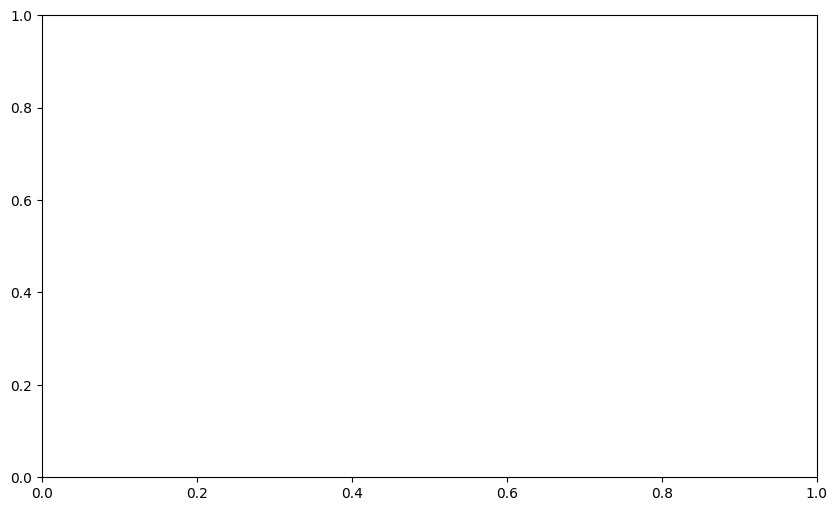

In [29]:
# Don't change this
fig, ax = plt.subplots(figsize=(10, 6))

cm = confusion_matrix(torch.tensor(targets).cpu().numpy(), torch.tensor(predictions).cpu().numpy())

# Get the class names
classes = os.listdir(train_dir)

# Display the confusion matrix (don't change this)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical", ax=ax)

**Task 1.5.20:** 

Create a data set for the test data.  It is located in the `sea_creatures/test` directory.  Then create a data loader from this data set.  _DO NOT_ shuffle this data!

In [30]:
# Predict the probabilities for each test image
test_probabilities = predict(model, test_loader, device)

# Get the index associated with the largest probability for each test image
test_predictions = torch.argmax(test_probabilities,dim=1)

print("Number of predictions:", test_predictions.shape)

NameError: name 'predict' is not defined

**Task 1.5.22:** Convert the class index to the class name for each test image.

In [31]:
test_classes = [classes[i] for i in test_predictions]

print("Number of class predictions:", len(test_classes))

NameError: name 'test_predictions' is not defined

### Final checks

You can now check how accurate your model is by sampling some images from our `/test` directory. These images are not labled, so you'll need to check it manually.

The code below randomly samples 12 images from the test directory and shows them in a grid alongside its predicted label. Run it as many times as you want to get different samples.

How is it working?


In [32]:
import matplotlib.pyplot as plt
import random

# Sample 12 random indices from the test dataset
sample_indices = random.sample(range(len(test_loader.dataset.samples)), 12)

# Create a grid of 4x3 subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 10))

# Iterate over the sampled indices and plot the corresponding images
for ax, idx in zip(axes.flatten(), sample_indices):
    image_path = test_loader.dataset.samples[idx][0]
    img = Image.open(image_path)

    # Display the image on the axis
    ax.imshow(img)
    ax.axis('off')

    # Get the predicted class for this image
    predicted_class = test_classes[idx]

    # Set the title of the subplot to the predicted class
    ax.set_title(f"Predicted: {predicted_class}", fontsize=14)

plt.tight_layout()

NameError: name 'test_loader' is not defined